In [1]:
import matplotlib.pyplot as plt
import os
from glob import glob
src_path = "SHIT_TEST/TRAIN"
sub_class = os.listdir(src_path)
print(sub_class)

['360p', '144p', '240p', '1440p', '480p', '1080p', '720p', '2160p']


In [2]:
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)

In [3]:
import scipy

SHIT_TEST/TRAIN/360p


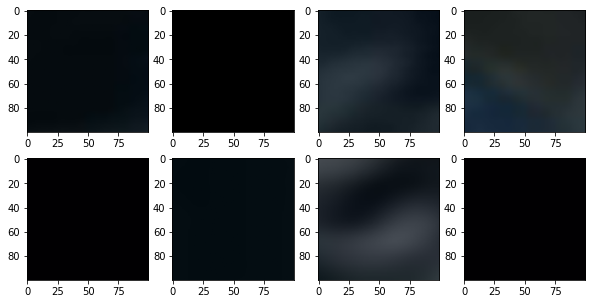

In [4]:
fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])
print(path)
count = 0
    #plt.subplot(240 + 1 + i)
    #img = plt.imread(os.path.join(path, "*.png"))
    #plt.imshow(img, cmap=plt.get_cmap('gray'))
for image in glob(os.path.join(path, '*.png')):
    if count == 4:
        break
    plt.subplot(240 + 1 + count)
    img = plt.imread(image)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    count += 1
    
path = os.path.join(src_path,sub_class[1])
for image in glob(os.path.join(path, '*.png')):
    if count == 8:
        break
    plt.subplot(240 + 1 + count)
    img = plt.imread(image)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    count += 1

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [6]:
SRC_PATH_TRAIN = 'DATA/TRAIN'
SRC_PATH_TEST = 'DATA/TEST'

In [7]:
train_datagen = ImageDataGenerator(
        zoom_range=0.05,
        shear_range=0.2,
        horizontal_flip=True,
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=SRC_PATH_TRAIN,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="sparse",
    subset='training',
    shuffle=True,
    seed=123
)
valid_generator = train_datagen.flow_from_directory(
    directory=SRC_PATH_TRAIN,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation',
    shuffle=True,
    seed=123
)
test_generator = test_datagen.flow_from_directory(
    directory=SRC_PATH_TEST,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=123
)

Found 959592 images belonging to 8 classes.
Found 239892 images belonging to 8 classes.
Found 171600 images belonging to 8 classes.


In [9]:
for images_batch, labels_batch in train_generator:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(8, 100, 100, 3)
(8,)


In [10]:
num_classes = 8
with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(100, 100, 3)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(num_classes)
    ])

2022-01-08 13:26:43.673116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:26:43.849065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:26:43.849603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:26:43.850718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1900] Ignoring visible gpu device (device: 0, name: Quadro 1000M, pci bus id: 0000:01:00.0, compute capability: 2.1) with Cuda compute capability 2.1. The minimum required Cuda capability is 3.5.


In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [13]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
with tf.device('/CPU:0'):
    history = model.fit(
            train_generator,
            epochs=10,
            validation_data=valid_generator,
            callbacks=[cp_callback])


Epoch 1/10
119949/119949 [==============================] - ETA: 0s - loss: 1.7374 - accuracy: 0.2909
Epoch 1: saving model to training_1/cp.ckpt
119949/119949 [==============================] - 11100s 93ms/step - loss: 1.7374 - accuracy: 0.2909 - val_loss: 1.4253 - val_accuracy: 0.4128
Epoch 2/10
 40204/119949 [=========>....................] - ETA: 1:45:35 - loss: 1.5378 - accuracy: 0.3741

In [ ]:
score = model.evaluate(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predict=model.predict(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
